In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.keras as keras

In [10]:
import timeit
SEED = int(timeit.time.time())
n_samples = 50

In [11]:
def linear_data_generator(n_samples):
    X = np.array(range(n_samples))
    random_noise = np.random.uniform(-10, 20,        size=n_samples)
    y = 3.5 * X + random_noise
    
    return X, y

In [12]:
x_samples, y_samples = linear_data_generator(n_samples)
data = np.vstack([x_samples, y_samples]).T
print(data[:5])

[[ 0.         -9.60429073]
 [ 1.         10.53313538]
 [ 2.         12.37082345]
 [ 3.          4.9095217 ]
 [ 4.          4.15947313]]


In [13]:
df = pd.DataFrame(data, columns=['x', 'y'])
X = df[['x']].values
y = df[['y']].values
df.head()

,x,y
0,0.0,-9.604291
1,1.0,10.533135
2,2.0,12.370823
3,3.0,4.909522
4,4.0,4.159473


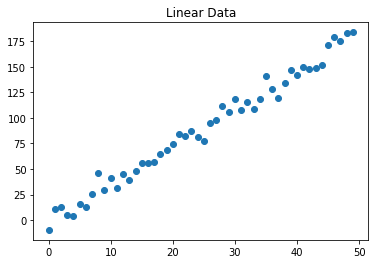

In [14]:
plt.title('Linear Data')
plt.scatter(x=df['x'], y=df['y'])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [18]:
print (f"X_train: {x_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {x_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {x_test.shape}, y_test: {y_test.shape}")

X_train: (33, 1), y_train: (33, 1)
X_val: (9, 1), y_test: (9, 1)
X_test: (8, 1), y_test: (8, 1)


In [11]:
x_mean = x_train.mean()
x_std = x_train.std()

y_mean = y_train.mean()
y_std = y_train.std()

In [25]:
x_train = (x_train - x_mean) / x_std
y_train = (y_train - y_mean) / y_std

x_val = (x_val - x_mean) / x_std 
y_val = (y_val - y_mean) / y_std

x_test = (x_test - x_mean) / x_std
y_test = (y_test - y_mean) / y_std

In [26]:
print (f"X_train: mean: {np.mean(x_train, axis=0)[0]:.1f}, std: {np.std(x_train, axis=0)[0]:.1f}")
print (f"y_train: mean: {np.mean(y_train, axis=0)[0]:.1f}, std: {np.std(y_train, axis=0)[0]:.1f}")
print (f"X_val: mean: {np.mean(x_val, axis=0)[0]:.1f}, std: {np.std(x_val, axis=0)[0]:.1f}")
print (f"y_val: mean: {np.mean(y_val, axis=0)[0]:.1f}, std: {np.std(y_val, axis=0)[0]:.1f}")
print (f"X_test: mean: {np.mean(x_test, axis=0)[0]:.1f}, std: {np.std(x_test, axis=0)[0]:.1f}")
print (f"y_test: mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

X_train: mean: 0.0, std: 1.0
y_train: mean: -0.0, std: 1.0
X_val: mean: 0.4, std: 0.8
y_val: mean: 0.4, std: 0.8
X_test: mean: -0.2, std: 1.1
y_test: mean: -0.2, std: 1.0


In [27]:
len_input = x_train[0].shape
len_output = y_train[0].shape

In [48]:
stddev_W = np.sqrt(2.0 / (np.sum(len_input + len_output)))
W = np.random.normal(loc=0.0, scale=stddev_W, size=len_input + len_output)
b = np.zeros(1)
print(f"W: {W.shape}")
print(f"b: {b.shape}")

W: (1, 1)
b: (1,)


In [49]:
y_pred = np.dot(x_train, W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (33, 1)


In [50]:
loss = np.mean((y_train - y_pred)**2)
print(f"Loss {loss:.2f}")

Loss 2.11


In [51]:
dy = np.mean(2 * (y_pred - y_train))
dW = dy * x_train
db = dy * 1

In [60]:
learning_rate = 1e-1
n_epoch = 200

In [65]:
def forward(x, W, b):
    return np.dot(x, W) + b

def accuracy(pred, target):
    return np.mean(np.abs(pred - target) < 1)

def loss_func(pred, target, W, b):
    return np.mean((pred - target)**2)

In [66]:
for cur_epoch in range(n_epoch):
    # Forward
    y_pred = forward(x_train, W, b)
    y_acc = accuracy(y_pred, y_train)
    loss = loss_func(y_pred, y_train, W, b)

    if cur_epoch % 20 == 0:
        val_pred = forward(x_val, W, b)
        val_acc = accuracy(y_pred, y_train)
        val_loss = loss_func(y_pred, y_train, W, b)
        print(f"Train loss: {loss:.4f}, Train Accuracy {y_acc:.4f}"
                f"Validation loss: {loss:.4f}, Validation accuracy {val_acc:.4f}")


    # Backward
    dW = np.mean(2 * (y_pred - y_train) * x_train)
    db = dy * 1

    W -= learning_rate * dW
    b -= learning_rate * db

Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000
Train loss: 0.0223, Train Accuracy 1.0000Validation loss: 0.0223, Validation accuracy 1.0000


In [69]:
pred_test = forward(x_test, W, b)
acc_test = accuracy(pred_test, y_test)
loss_test = loss_func(pred_test, y_test, W, b)
print(f"Test loss {loss_test:.4f}, Test Accuracy {acc_test:.4f}")

Test loss 0.0269, Test Accuracy 1.0000


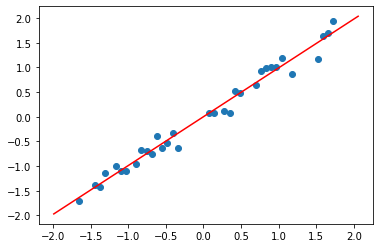

In [76]:
plt.scatter(x=x_train, y=y_train)
start_x = x_train.min() - (x_train.max() - x_train.min()) * 0.1
stop_x = x_train.max() + (x_train.max() - x_train.min()) * 0.1

start_y = y_train.min() - (y_train.max() - y_train.min()) * 0.1
stop_y = y_train.max() + (y_train.max() - y_train.min()) * 0.1

x_plot_range = np.arange(start_x, stop_x, .01)
linear_y = forward(x_plot_range[:, np.newaxis], W, b)
plt.plot(x_plot_range, linear_y, 'r')
plt.show()

In [77]:
W_unscaled = y_std / x_std * W 
b_unscaled = y_std * b + y_mean - y_std / x_std * W * x_mean

In [85]:
print(f"slope: {W_unscaled[0, 0]:.3f}, intercept {b_unscaled[0, 0]:.3f}")

slope: 3.503, intercept 7.572


array([[7.57168873]])

# Keras implementation

In [88]:
from keras import layers, optimizers, losses, metrics, models

In [89]:
class LinearRegressionKeras(models.Model):
    def __init__(self, input_shape):
        super().__init__(name='LinearRegressionKeras')
        self.fc1 = layers.Dense(1, input_shape=input_shape, activation='linear')

    def call(self, inputs):
        y = self.fc1(inputs)
        return y

In [102]:
lin_reg = LinearRegressionKeras((1,))
lin_reg.compile(optimizer='sgd', loss='mean_squared_error',
                metrics=[metrics.mean_absolute_percentage_error])

In [103]:
hist = lin_reg.fit(x_train, y_train, batch_size=5, epochs=100,
                    validation_data=[x_val, y_val],
                    verbose=1)

Train on 33 samples, validate on 9 samples
Epoch 1/100
33/33 [==============================] - 18s 556ms/step - loss: 0.2385 - mean_absolute_percentage_error: 49.5468 - val_loss: 0.1662 - val_mean_absolute_percentage_error: 62.7678
Epoch 2/100
33/33 [==============================] - 0s 870us/step - loss: 0.1832 - mean_absolute_percentage_error: 43.7750 - val_loss: 0.1310 - val_mean_absolute_percentage_error: 59.1813
Epoch 3/100
33/33 [==============================] - 0s 830us/step - loss: 0.1427 - mean_absolute_percentage_error: 40.4128 - val_loss: 0.1059 - val_mean_absolute_percentage_error: 56.0261
Epoch 4/100
33/33 [==============================] - 0s 686us/step - loss: 0.1140 - mean_absolute_percentage_error: 37.7723 - val_loss: 0.0871 - val_mean_absolute_percentage_error: 53.3309
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: 0.0921 - mean_absolute_percentage_error: 36.3024 - val_loss: 0.0724 - val_mean_absolute_percentage_error: 50.8262
Epoch 6/100
3

In [106]:
test_res = lin_reg.evaluate(x_test, y_test)

8/8 [==============================] - 0s 695us/step


In [107]:
test_res

[0.02695489674806595, 18.498397827148438]

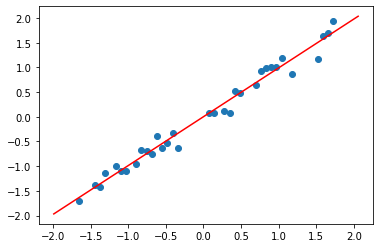

In [108]:
plt.scatter(x=x_train, y=y_train)
start_x = x_train.min() - (x_train.max() - x_train.min()) * 0.1
stop_x = x_train.max() + (x_train.max() - x_train.min()) * 0.1

start_y = y_train.min() - (y_train.max() - y_train.min()) * 0.1
stop_y = y_train.max() + (y_train.max() - y_train.min()) * 0.1

x_plot_range = np.arange(start_x, stop_x, .01)
linear_y = lin_reg.predict(x_plot_range)
plt.plot(x_plot_range, linear_y, 'r')
plt.show()

In [111]:
W, b = lin_reg.layers[0].get_weights()

In [114]:
W_unscaled = y_std / x_std * W 
b_unscaled = y_std * b + y_mean - y_std / x_std * W * x_mean
print(f"slope: {W_unscaled[0, 0]:.3f}, intercept {b_unscaled[0, 0]:.3f}")

slope: 3.501, intercept 7.668


# TensorFlow Implementation

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
x_train_scaled = x_scaler.transform(x_train)
y_train_scaled = y_scaler.transform(y_train)

x_val_scaled = x_scaler.transform(x_val)
y_val_scaled = y_scaler.transform(y_val)

x_test_scaled = x_scaler.transform(x_test)
y_test_scaled = y_scaler.transform(y_test)

In [22]:
print (f"X_train: mean: {np.mean(x_train_scaled, axis=0)[0]:.1f}, std: {np.std(x_train_scaled, axis=0)[0]:.1f}")
print (f"y_train: mean: {np.mean(y_train_scaled, axis=0)[0]:.1f}, std: {np.std(y_train_scaled, axis=0)[0]:.1f}")
print (f"X_val: mean: {np.mean(x_val_scaled, axis=0)[0]:.1f}, std: {np.std(x_val_scaled, axis=0)[0]:.1f}")
print (f"y_val: mean: {np.mean(y_val_scaled, axis=0)[0]:.1f}, std: {np.std(y_val_scaled, axis=0)[0]:.1f}")
print (f"X_test: mean: {np.mean(x_test_scaled, axis=0)[0]:.1f}, std: {np.std(x_test_scaled, axis=0)[0]:.1f}")
print (f"y_test: mean: {np.mean(y_test_scaled, axis=0)[0]:.1f}, std: {np.std(y_test_scaled, axis=0)[0]:.1f}")

X_train: mean: -0.0, std: 1.0
y_train: mean: -0.0, std: 1.0
X_val: mean: -0.5, std: 1.0
y_val: mean: -0.6, std: 1.0
X_test: mean: -0.7, std: 0.8
y_test: mean: -0.7, std: 0.8


In [23]:
W = tf.Variable(tf.truncated_normal(shape=(1, )), name='W')
b = tf.Variable(0., name='b')

In [24]:
x = tf.placeholder(dtype=tf.float32, name='x')
t = tf.placeholder(dtype=tf.float32, name='t')

In [28]:
def model(x):
    return W * x + b

def mse(pred, target):
    return tf.reduce_mean(tf.square(pred - target))

In [25]:
y = W * x + b

In [26]:
loss = tf.reduce_mean(tf.square(y - t))

In [27]:
grads = tf.gradients(ys=[loss], xs=[W, b])

In [33]:
    learning_rate = 0.05
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    for i in range(500):
        train_pred = sess.run(y, feed_dict={
            x: x_train_scaled
        })
        train_loss = sess.run(loss, feed_dict={
            y: train_pred,
            t: y_train_scaled
        })

        grads_val = sess.run(grads, feed_dict={
            x: x_train_scaled,
            t: y_train_scaled
        })

        sess.run(W.assign_sub(learning_rate * grads_val[0]), feed_dict={
            y: train_pred,
            t: y_train_scaled
        })
        sess.run(b.assign_sub(learning_rate * grads_val[1]),
        feed_dict={
             y: train_pred,
            t: y_train_scaled
        })

        if i % 25 == 0:
            print(f"Train Loss {train_loss}")

Train Loss 0.03544328361749649
Train Loss 0.01706130988895893
Train Loss 0.016966573894023895
Train Loss 0.0169660821557045
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935
Train Loss 0.01696608029305935


In [48]:
w_val, b_val = sess.run([W, b])

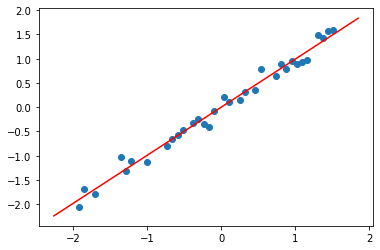

In [49]:
plt.scatter(x=x_train_scaled, y=y_train_scaled)
start_x = x_train_scaled.min() - (x_train_scaled.max() - x_train_scaled.min()) * 0.1
stop_x = x_train_scaled.max() + (x_train_scaled.max() - x_train_scaled.min()) * 0.1

start_y = y_train_scaled.min() - (y_train_scaled.max() - y_train_scaled.min()) * 0.1
stop_y = y_train_scaled.max() + (y_train_scaled.max() - y_train_scaled.min()) * 0.1

x_plot_range = np.arange(start_x, stop_x, .01)
linear_y = sess.run(y, feed_dict={x: x_plot_range})
plt.plot(x_plot_range, linear_y, 'r')
plt.show()

In [50]:
y_std, y_mean = np.sqrt(y_scaler.var_), y_scaler.mean_

x_std, x_mean = np.sqrt(x_scaler.var_), x_scaler.mean_

W_unscaled = y_std / x_std * w_val 
b_unscaled = y_std * b_val + y_mean - y_std / x_std * w_val * x_mean
print(f"slope: {W_unscaled[0]:.3f}, intercept {b_unscaled[0]:.3f}")

slope: 3.684, intercept -1.325


array([-275.42639938])